##1) Digital filter design: Design a discrete-time lowpass filter for the specifications given below:
- Sampling frequency = 10 kHz;
- Passband edge = 260 Hz; stopband edge = 340 Hz;
- Passband ripple = 0.1 dB; min. stopband attenuation = 30 dB
### Use the following filter design methods and write your own code to achieve the given specifications.
(a) Hamming windowing<br>
### Optional: You can also try using Matlab's fdatool or equivalent python tool for filter design to obtain a Parks-MCClellan or Remez filter.

We translate the given specifications into the digital frequency domain by using the relation:<br>
$ω = ΩT_{s} = \frac{Ω}{F_{s}} = \frac{2πf}{F_s}$
<br> where Ω , ω represent the analog and  digital frequencies respectively ,$T_{s}$ represents the sampling period, $F_{s}$ represents the sampling frequency.
- passband frequency $ω_{p} = \frac{Ω_{p}}{F_{s}} = \frac{2πf_{p}}{F_s}$ and stopband frequency $ω_{s} = \frac{Ω_{s}}{F_{s}} = \frac{2πf_{s}}{F_s}$
- cut-off frequency of the ideal filter is 
 $ ω_{c} = \frac{ω_{p} + ω_{s}}{2}$
- transition band is $Δω = ω_{p} - ω_{s}$. 
- The main lobe width of the Hamming window is approximately $\frac{8π}{M}$ , so $M \geq\frac{8π}{Δω}$ where M+1 is the number of filter coefficients.
- The pass-band ripple is $20log_{10}(1+ \delta_{1})$ and stop-band attenuation is $-20log_{10}(\delta_{2})$.
- The hamming window is as follows:<br>
$ \
w[n] =  
\begin{cases}
  0.5 - 0.46cos(\frac{2πn}{M}),& \text{if } 0\leq n \leq M\\
  0,& \text{otherwise}
\end{cases}
\
$
- The impulse response of a low-pass filter with cut-off frequency of $ω_{c}$ is: <br>
$h_{d,lowpass}[n] = \frac{ω_{c}}{π}sinc(\frac{ω_{c}n}{π})$
- To have a causal linear-phase response, we need to apply a time shift equal to $\frac{M}{2}$ in the ideal impulse response $h_{d,lowpass}[n]$ and multiply the result by w[n]. Therefore, we obtain the FIR response as:<br>
$ \
h[n] =  
\begin{cases}
  h_{d,lowpass}[n-\frac{M}{2}]w[n],& \text{if } 0\leq n \leq M\\
  0,& \text{otherwise}
\end{cases}
\
$
<br> i.e.,

$ \
h[n] =  
\begin{cases}
  \frac{ω_{c}}{π}sinc(\frac{ω_{c}(n-\frac{M}{2})}{π})( 0.5 - 0.46cos(\frac{2πn}{M})),& \text{if } 0\leq n \leq M\\
  0,& \text{otherwise}
\end{cases}
\
$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

Fs  = 10000 # sampling frequency
fp,fs = 260,340  # passband and stopband cut-off frequencies 
pb_ripple_db = 0.1 # passband ripple
sb_ripple_db = 30  # stopband attenuation

#First we translate the specifications into the digital frequency domain:
wp_ = round(2*fp/Fs ,3)  
ws_ = round(2*fs/Fs ,3)
deltaw_ = round(ws_ - wp_ ,3)

pb_ripple = 10**(pb_ripple_db/20) - 1 
sb_ripple = 10**(-sb_ripple_db/20)

wp = wp_ * np.pi  # passband frequency in radians
ws = ws_ * np.pi  # stopband frequency in radians
deltaw = deltaw_* np.pi  # transition width in radians
wc = (wp+ws)/2  # cut-off frequency in radians

M = round(8*np.pi/deltaw)  # number of filter coefficients - 1 

In [ ]:
n=np.arange(0,M+1,1)

# HAMMING WINDOW

w=[0]*(M+1)
for i in range(M+1):
    w[i] = 0.54 - 0.46*np.cos(2*i*np.pi/M)

# DESIRED IMPULSE RESPONSE

hd=[0]*(M+1)
for i in range(M+1):
    hd[i] = (wc/np.pi) * np.sinc(wc*(i-M/2)/np.pi)

# DESIGNED IMPULSE RESPONSE
h = np.multiply(w,hd)

# FREQUENCE RESPONSE OF WINDOW
(omega1,W) =freqz(w)

# FREQUENCY RESPONSE OF DESIRED LOW-PASS FILTER
(omega2,Hd) =freqz(hd)

# FREQUENCY RESPONSE OF DESIGNED LOW-PASS FILTER
(omega3,H) =freqz(h)


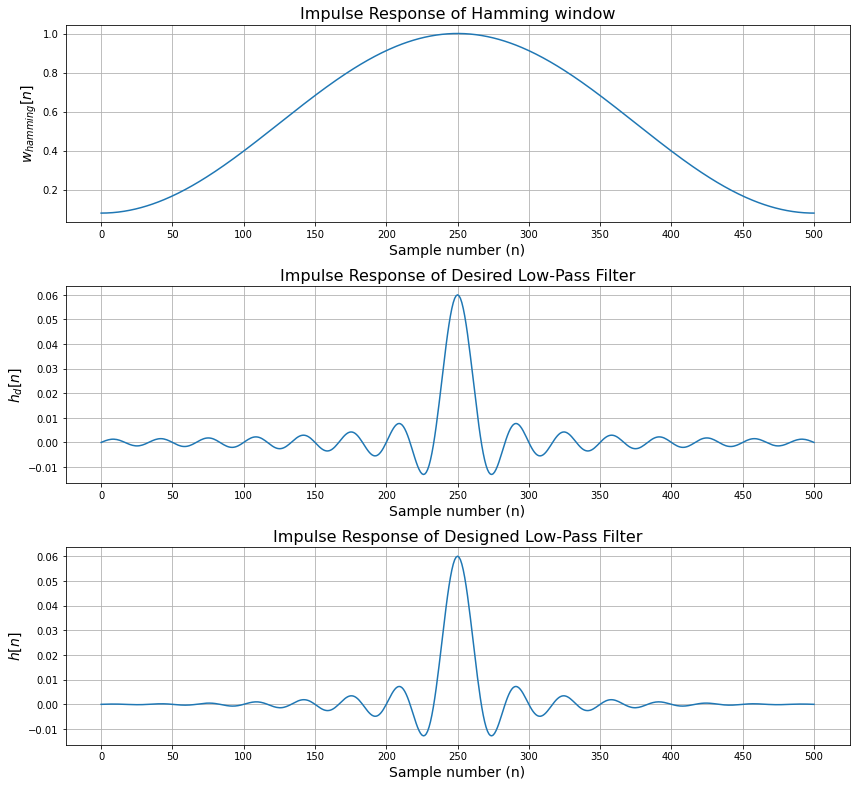

In [ ]:
# PLOTTING IMPULSE RESPONSES 
figure = plt.figure(figsize=(12,12))

plt.subplot(311)
plt.title("Impulse Response of Hamming window",fontsize="16")
plt.xticks(np.arange(0,M+0.01,50))
plt.xlabel("Sample number (n)",fontsize="14")
plt.ylabel("$w_{hamming}[n]$",fontsize="14")
plt.plot(n,w)
plt.grid(True)

plt.subplot(312)
plt.title("Impulse Response of Desired Low-Pass Filter",fontsize="16")
plt.xticks(np.arange(0,M+0.01,50))
plt.xlabel("Sample number (n)",fontsize="14")
plt.ylabel("$h_d[n]$",fontsize="14")
plt.plot(n,hd)
plt.grid(True)

plt.subplot(313)
plt.title("Impulse Response of Designed Low-Pass Filter",fontsize="16")
plt.xticks(np.arange(0,M+0.01,50))
plt.xlabel("Sample number (n)",fontsize="14")
plt.ylabel("$h[n]$",fontsize="14")
plt.plot(n,h)
plt.grid(True)

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

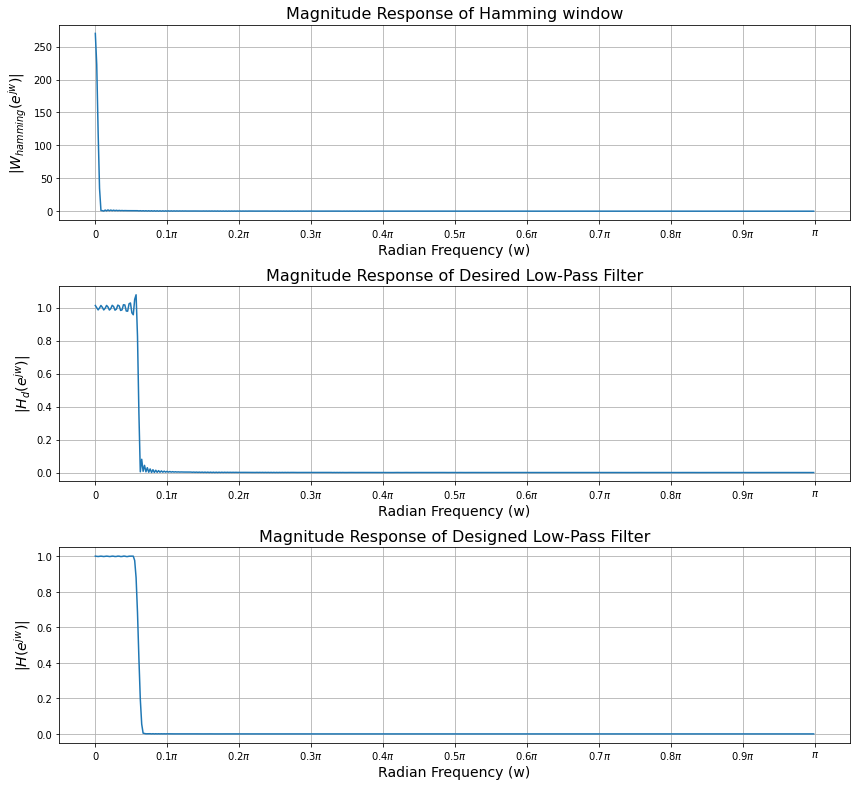

In [ ]:
# PLOTTING MAGNITUDE RESPONSES IN LINEAR SCALE

figure = plt.figure(figsize=(12,12))

plt.subplot(311)
plt.title("Magnitude Response of Hamming window",fontsize="16")
plt.xticks([0, 0.1*np.pi,0.2*np.pi, 0.3*np.pi,0.4*np.pi, 0.5*np.pi,0.6*np.pi, 0.7*np.pi,0.8*np.pi,0.9*np.pi,np.pi],
           [r'$0$', r'$0.1\pi$',r'$0.2\pi$',r'$0.3\pi$',r'$0.4\pi$', r'$0.5\pi$',r'$0.6\pi$',r'$0.7\pi$',r'$0.8\pi$',r'$0.9\pi$',r'$\pi$'])
plt.plot(omega1,np.abs(W))
plt.xlabel("Radian Frequency (w)",fontsize="14")
plt.ylabel("$|W_{hamming}(e^{jw})|$",fontsize="14")
plt.grid(True)

plt.subplot(312)
plt.title("Magnitude Response of Desired Low-Pass Filter",fontsize="16")
plt.xticks([0, 0.1*np.pi,0.2*np.pi, 0.3*np.pi,0.4*np.pi, 0.5*np.pi,0.6*np.pi, 0.7*np.pi,0.8*np.pi,0.9*np.pi,np.pi],
           [r'$0$', r'$0.1\pi$',r'$0.2\pi$',r'$0.3\pi$',r'$0.4\pi$', r'$0.5\pi$',r'$0.6\pi$',r'$0.7\pi$',r'$0.8\pi$',r'$0.9\pi$',r'$\pi$'])
plt.plot(omega2,np.abs(Hd))
plt.xlabel("Radian Frequency (w)",fontsize="14")
plt.ylabel("$|H_{d}(e^{jw})|$",fontsize="14")
plt.grid(True)

plt.subplot(313)
plt.title("Magnitude Response of Designed Low-Pass Filter",fontsize="16")
plt.xticks([0, 0.1*np.pi,0.2*np.pi, 0.3*np.pi,0.4*np.pi, 0.5*np.pi,0.6*np.pi, 0.7*np.pi,0.8*np.pi,0.9*np.pi,np.pi],
           [r'$0$', r'$0.1\pi$',r'$0.2\pi$',r'$0.3\pi$',r'$0.4\pi$', r'$0.5\pi$',r'$0.6\pi$',r'$0.7\pi$',r'$0.8\pi$',r'$0.9\pi$',r'$\pi$'])
plt.plot(omega3,np.abs(H))
plt.xlabel("Radian Frequency (w)",fontsize="14")
plt.ylabel("$|H(e^{jw})|$",fontsize="14")
plt.grid(True)

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


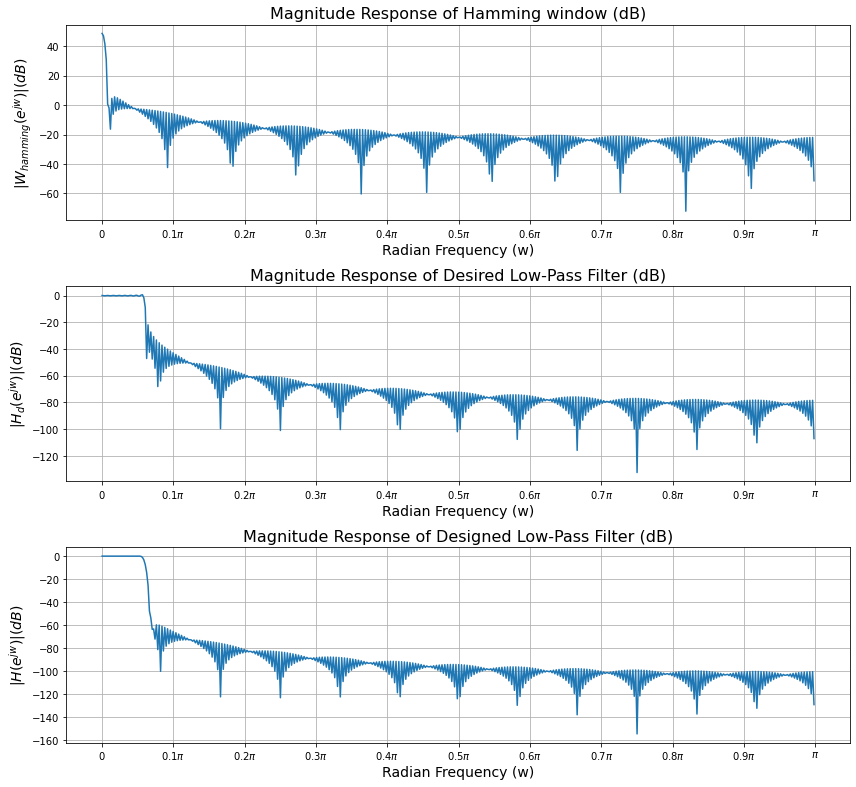

In [ ]:
# PLOTTING MAGNITUDE RESPONSES IN dB SCALE
figure = plt.figure(figsize=(12,12))

plt.subplot(311)
plt.title("Magnitude Response of Hamming window (dB)",fontsize="16")
plt.xticks([0, 0.1*np.pi,0.2*np.pi, 0.3*np.pi,0.4*np.pi, 0.5*np.pi,0.6*np.pi, 0.7*np.pi,0.8*np.pi,0.9*np.pi,np.pi],
           [r'$0$', r'$0.1\pi$',r'$0.2\pi$',r'$0.3\pi$',r'$0.4\pi$', r'$0.5\pi$',r'$0.6\pi$',r'$0.7\pi$',r'$0.8\pi$',r'$0.9\pi$',r'$\pi$'])
plt.plot(omega1,20*np.log10(np.abs(W)))
plt.xlabel("Radian Frequency (w)",fontsize="14")
plt.ylabel("$|W_{hamming}(e^{jw})|(dB)$",fontsize="14")
plt.grid(True)

plt.subplot(312)
plt.title("Magnitude Response of Desired Low-Pass Filter (dB)",fontsize="16")
plt.xticks([0, 0.1*np.pi,0.2*np.pi, 0.3*np.pi,0.4*np.pi, 0.5*np.pi,0.6*np.pi, 0.7*np.pi,0.8*np.pi,0.9*np.pi,np.pi],
           [r'$0$', r'$0.1\pi$',r'$0.2\pi$',r'$0.3\pi$',r'$0.4\pi$', r'$0.5\pi$',r'$0.6\pi$',r'$0.7\pi$',r'$0.8\pi$',r'$0.9\pi$',r'$\pi$'])
plt.plot(omega2,20*np.log10(np.abs(Hd)))
plt.xlabel("Radian Frequency (w)",fontsize="14")
plt.ylabel("$|H_{d}(e^{jw})|(dB)$",fontsize="14")
plt.grid(True)

plt.subplot(313)
plt.title("Magnitude Response of Designed Low-Pass Filter (dB)",fontsize="16")
plt.xticks([0, 0.1*np.pi,0.2*np.pi, 0.3*np.pi,0.4*np.pi, 0.5*np.pi,0.6*np.pi, 0.7*np.pi,0.8*np.pi,0.9*np.pi,np.pi],
           [r'$0$', r'$0.1\pi$',r'$0.2\pi$',r'$0.3\pi$',r'$0.4\pi$', r'$0.5\pi$',r'$0.6\pi$',r'$0.7\pi$',r'$0.8\pi$',r'$0.9\pi$',r'$\pi$'])
plt.plot(omega3,20*np.log10(np.abs(H)))
plt.xlabel("Radian Frequency (w)",fontsize="14")
plt.ylabel("$|H(e^{jw})|(dB)$",fontsize="14")
plt.grid(True)

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# SPECIFICATIONS OF THE DESIRED LOW-PASS FILTER

print("The desired impulse response has length:",M+1)
print()
print("---> The desired low pass filter magnitude response |H(e^(jw))| has the following specifications:")
print()
print("Passband frequency : "+str(wp/np.pi)+"π radians ")
print("Stopband frequency : "+str(ws/np.pi)+"π radians ")
print("Transition width : "+str(deltaw/np.pi)+"π radians ")
print("Cut-off frequency : "+str(wc/np.pi)+"π radians ")
print("Passband ripple : "+str(pb_ripple_db)+" dB ")
print("Stopband attenuation : "+str(sb_ripple_db)+" dB ")
print()
print(str(round(1-pb_ripple,4))+"≤|H(e^(jw))|≤"+str(round(1+pb_ripple,4))+" for 0≤|w|≤"+str(wp/np.pi)+"π")
print("0≤|H(e^(jw))|≤"+str(round(sb_ripple,4))+" for "+str(ws/np.pi)+"π≤|w|≤π")

# SPECIFICATIONS OF THE DESIGNED LOW-PASS FILTER

# Find pass band ripple
pb_min = min(np.abs(H[0:int(fp/Fs*2 * len(H))]))
pb_max = max(np.abs(H[0:int(fp/Fs*2 * len(H))]))
pb_rip = 1 - (pb_max - pb_min)
pb_rip_dB = -20*np.log10(pb_rip)
# Find stop band attenuation
sb_max = max(np.abs(H[int(fs/Fs*2 * len(H)+1):len(H)]))
sb_rip = sb_max
sb_rip_dB = -20*np.log10(sb_rip)
print()
print("---> The designed low pass filter magnitude response |H(e^(jw))| has the following specifications:")
print()
print("Pass band ripple : "+str(round(pb_rip_dB,2))+" dB")
print("Stop band attenuation : "+str(round(sb_rip_dB,2))+" dB ")
print()
print(str(round(pb_min,4))+"≤|H(e^(jw))|≤"+str(round(pb_max,4))+" for 0≤|w|≤"+str(wp/np.pi)+"π")
print("0≤|H(e^(jw))|≤"+str(round(sb_max,4))+" for "+str(ws/np.pi)+"π≤|w|≤π")


The desired impulse response has length: 501

---> The desired low pass filter magnitude response |H(e^(jw))| has the following specifications:

Passband frequency : 0.052π radians 
Stopband frequency : 0.068π radians 
Transition width : 0.016π radians 
Cut-off frequency : 0.06π radians 
Passband ripple : 0.1 dB 
Stopband attenuation : 30 dB 

0.9884≤|H(e^(jw))|≤1.0116 for 0≤|w|≤0.052π
0≤|H(e^(jw))|≤0.0316 for 0.068π≤|w|≤π

---> The designed low pass filter magnitude response |H(e^(jw))| has the following specifications:

Pass band ripple : 0.02 dB
Stop band attenuation : 53.66 dB 

0.9988≤|H(e^(jw))|≤1.0012 for 0≤|w|≤0.052π
0≤|H(e^(jw))|≤0.0021 for 0.068π≤|w|≤π


####(ii) Using REMEZ function

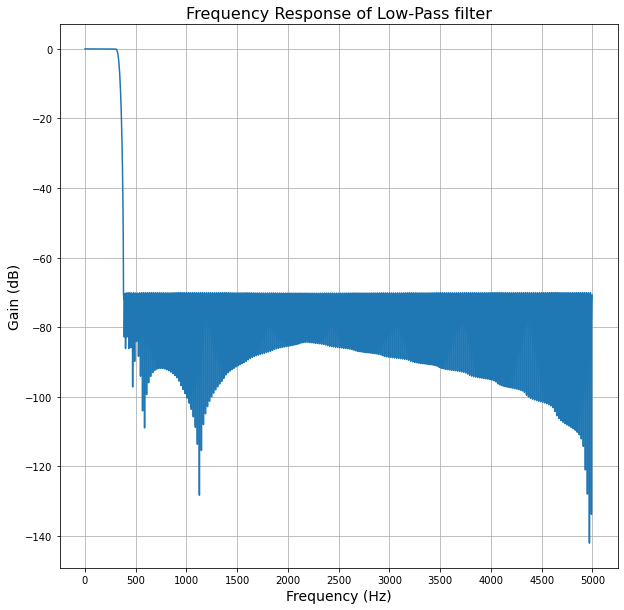

In [ ]:
from scipy import signal
cutoff = wc*Fs/(2*np.pi)  # cutoff frequency in Hz
trans_width = round((ws-wp)*Fs/(2*np.pi),3)  # transition width in Hz
taps = signal.remez(M+1, [0, cutoff, cutoff + trans_width, 0.5*Fs],
                    [1, 0], Hz=Fs)
w_, h_ = signal.freqz(taps, [1], worN=2000)

figure = plt.figure(figsize=(10,10))
plt.plot(0.5*Fs*w_/np.pi, 20*np.log10(np.abs(h_)))
plt.xticks(np.arange(0,5000+0.01,500))
plt.xlabel('Frequency (Hz)',fontsize="14")
plt.ylabel('Gain (dB)',fontsize="14")
plt.title("Frequency Response of Low-Pass filter",fontsize="16")
plt.grid(True)

##2)In this problem, you will listen to different frequency components of a music file to see what components of the music you are able to discern.
- First, fetch Johann Bach's music piece `Brandenburg Concerto No. 3 { 1. Allegro" from here:<br>
https://en.wikipedia.org/wiki/File:Bach_-_Brandenburg_Concerto_No._3_-_1._Allegro.ogg
- Convert the first 20 seconds to a WAV file.
- Use scipy.io.wavfile.* functions in Python to load the file.

In [ ]:
#select the audio file by running this cell.
from google.colab import files
uploaded = files.upload()
#the audio file will be added to the current directory

Saving Bach_-_Brandenburg_Concerto_No._3_-_1._Allegro.ogg to Bach_-_Brandenburg_Concerto_No._3_-_1._Allegro.ogg


Total Duration of file: 0:5:19
Total Duration of cropped file: 0:0:20
Duration of the audio file is 20.0 sec


Text(0.5, 1.0, 'Audio file( 20 secs)')

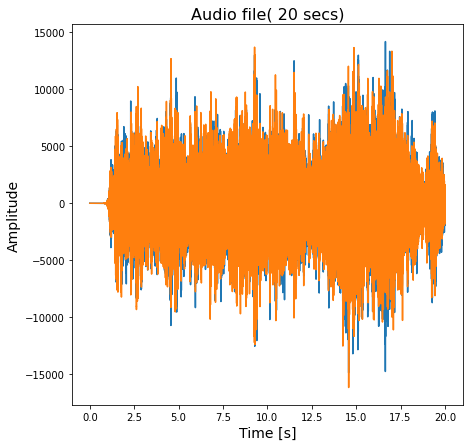

In [ ]:
# fetching the audio file
import soundfile as sf
data_,samplerate_ =  sf.read('Bach_-_Brandenburg_Concerto_No._3_-_1._Allegro.ogg')  # write the file name of the audio file
def output_duration(length):
    hours = length // 3600  # calculate in hours
    length %= 3600
    mins = length // 60  # calculate in minutes
    length %= 60
    seconds = length  # calculate in seconds
  
    return hours, mins, seconds

len_data = len(data_)  # holds length of the numpy array
t = len_data / samplerate_  # returns duration but in floats
hours, mins, seconds = output_duration(int(t))
print('Total Duration of file: {}:{}:{}'.format(hours, mins, seconds))

# extracting first 20 seconds of audio
new_data = data_[0:samplerate_*20]
len_data = len(new_data)  # holds length of the numpy array
t1 = len_data / samplerate_  # returns duration but in floats  
hours1, mins1, seconds1 = output_duration(int(t1))
print('Total Duration of cropped file: {}:{}:{}'.format(hours1, mins1, seconds1))

# writing the first 20 sec into a wav file
sf.write("/content/Bach_-_Brandenburg_Concerto_No._3_-_1._Allegro.wav",new_data,samplerate_)  # creates a wav file 

# reading the wav file
from scipy.io.wavfile import read
from scipy.io.wavfile import write

samplerate, data =  read('Bach_-_Brandenburg_Concerto_No._3_-_1._Allegro.wav')
duration = len(data)/samplerate
print("Duration of the audio file is "+str(duration)+" sec")

time = np.arange(0,duration,1/samplerate)

figure = plt.figure(figsize=(7, 7))

plt.plot(time,data)
plt.xlabel('Time [s]',fontsize="14")
plt.ylabel('Amplitude',fontsize="14")
plt.title('Audio file( 20 secs)',fontsize="16")


####Now, do the following:<br>
(a) Develop four linear phase filters using remez, each of length 200. The first should be a low-pass filter with cut-off corresponding to 4 kHz. The second should be a band-pass filter with pass-band
between 4 to 8 kHz. The third is a band-pass filter with pass-band from 8 to 12 kHz. The final
filter is a band-pass filter with pass-band from 12 to 16 kHz.

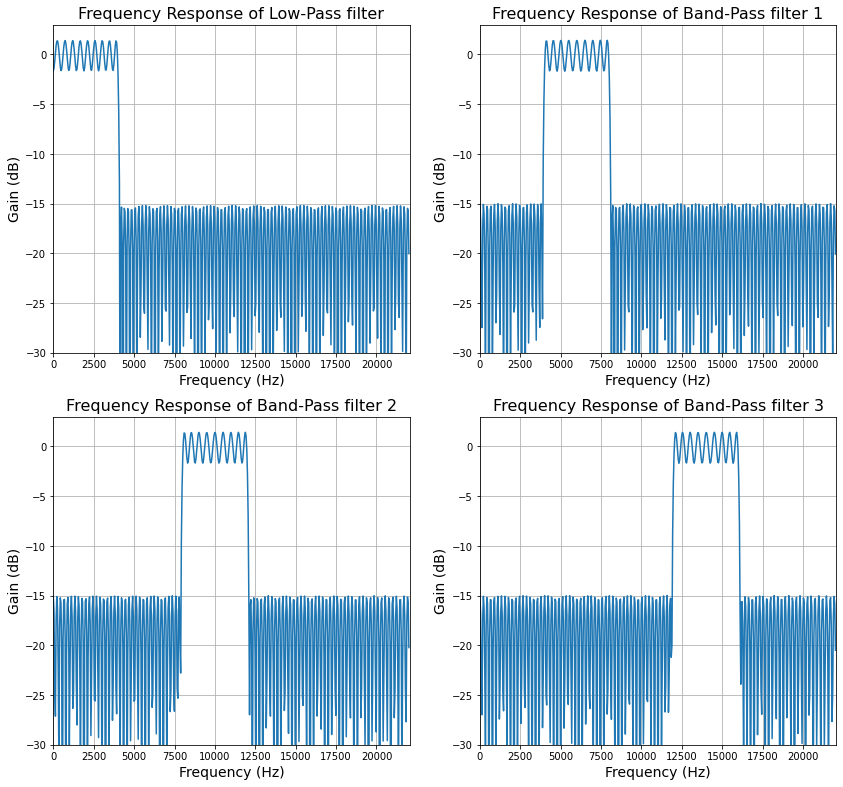

In [ ]:

numtaps = 200  # length of filter
fc_lpf = 4000  # cut-off frequency of LPF in Hz
trans_width=100 #  Width of transition from pass band to stop band in Hz
pb_bpf1 = [4000,8000]  # passband of BPF 1 in Hz
pb_bpf2 = [8000,12000] # passband of BPF 2 in Hz
pb_bpf3 = [12000,16000] # passband of BPF 3 in Hz
fs = samplerate  # sampling frequency

# LPF
taps1 = signal.remez(numtaps, [0, fc_lpf, fc_lpf + trans_width, 0.5*fs], [1, 0], Hz=fs)
w1, filter1 = signal.freqz(taps1, [1], worN=512)

# BPF1
edges1 = [0, pb_bpf1[0] - trans_width, pb_bpf1[0], pb_bpf1[1], pb_bpf1[1] + trans_width, 0.5*fs]
taps2 = signal.remez(numtaps, edges1, [0, 1, 0], Hz=fs)
w2, filter2 = signal.freqz(taps2, [1], worN=512)

# BPF2
edges2 = [0, pb_bpf2[0] - trans_width, pb_bpf2[0], pb_bpf2[1], pb_bpf2[1] + trans_width, 0.5*fs]
taps3 = signal.remez(numtaps, edges2, [0, 1, 0], Hz=fs)
w3, filter3 = signal.freqz(taps3, [1], worN=512)

# BPF3
edges3 = [0, pb_bpf3[0] - trans_width, pb_bpf3[0], pb_bpf3[1], pb_bpf3[1] + trans_width, 0.5*fs]
taps4 = signal.remez(numtaps, edges3, [0, 1, 0], Hz=fs)
w4, filter4 = signal.freqz(taps4, [1], worN=512)

figure = plt.figure(figsize=(12,12))

# PLOTTING LPF
ax = figure.add_subplot(221)
#plt.subplot(221)
ax.plot(0.5*fs*w1/np.pi, 20*np.log10(np.abs(filter1)))
ax.set_ylim(-30, 3)
ax.set_xlim(0, 0.5*fs)
plt.xlabel('Frequency (Hz)',fontsize="14")
plt.ylabel('Gain (dB)',fontsize="14")
plt.title("Frequency Response of Low-Pass filter",fontsize="16")
plt.grid(True)

# PLOTTING BPF 1
ax = figure.add_subplot(222)
#plt.subplot(222)
plt.plot(0.5*fs*w2/np.pi, 20*np.log10(np.abs(filter2)))
ax.set_ylim(-30, 3)
ax.set_xlim(0, 0.5*fs)
plt.xlabel('Frequency (Hz)',fontsize="14")
plt.ylabel('Gain (dB)',fontsize="14")
plt.title("Frequency Response of Band-Pass filter 1",fontsize="16")
plt.grid(True)

# PLOTTING BPF 2
ax = figure.add_subplot(223)
#plt.subplot(223)
plt.plot(0.5*fs*w3/np.pi, 20*np.log10(np.abs(filter3)))
ax.set_ylim(-30, 3)
ax.set_xlim(0, 0.5*fs)
plt.xlabel('Frequency (Hz)',fontsize="14")
plt.ylabel('Gain (dB)',fontsize="14")
plt.title("Frequency Response of Band-Pass filter 2",fontsize="16")
plt.grid(True)

# PLOTTING BPF 3
ax = figure.add_subplot(224)
#plt.subplot(224)
plt.plot(0.5*fs*w4/np.pi, 20*np.log10(np.abs(filter4)))
ax.set_ylim(-30, 3)
ax.set_xlim(0, 0.5*fs)
plt.xlabel('Frequency (Hz)',fontsize="14")
plt.ylabel('Gain (dB)',fontsize="14")
plt.title("Frequency Response of Band-Pass filter 3",fontsize="16")
plt.grid(True)

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

####(b) Filter both the left and right channels with each of the above filters. Listen to the output. What do you observe in each case?

In [ ]:
# LOW-PASS FILTERED OUTPUT OF AUDIO FILE
filtered_out_1_left = np.convolve(taps1,np.reshape(data[:,0],data[:,0].size))
sf.write('filtered_out_1_file1.wav', filtered_out_1_left, samplerate)
filtered_out_1_right = np.convolve(taps1,np.reshape(data[:,1],data[:,1].size))
sf.write('filtered_out_1_file2.wav', filtered_out_1_right, samplerate)

# BAND-PASS 1 FILTERED OUTPUT OF AUDIO FILE
filtered_out_2_left = np.convolve(taps2,np.reshape(data[:,0],data[:,0].size))
sf.write('filtered_out_2_file1.wav', filtered_out_2_left, samplerate)
filtered_out_2_right = np.convolve(taps2,np.reshape(data[:,1],data[:,1].size))
sf.write('filtered_out_2_file2.wav', filtered_out_2_right, samplerate)

# BAND-PASS 2 FILTERED OUTPUT OF AUDIO FILE
filtered_out_3_left = np.convolve(taps3,np.reshape(data[:,0],data[:,0].size))
sf.write('filtered_out_3_file1.wav', filtered_out_3_left, samplerate)
filtered_out_3_right = np.convolve(taps3,np.reshape(data[:,1],data[:,1].size))
sf.write('filtered_out_3_file2.wav', filtered_out_3_right, samplerate)

# BAND-PASS 3 FILTERED OUTPUT OF AUDIO FILE
filtered_out_4_left = np.convolve(taps4,np.reshape(data[:,0],data[:,0].size))
sf.write('filtered_out_4_file1.wav', filtered_out_4_left, samplerate)
filtered_out_4_right = np.convolve(taps4,np.reshape(data[:,1],data[:,1].size))
sf.write('filtered_out_4_file2.wav', filtered_out_4_right, samplerate)


####Observation:
- A low-pass filter (LPF) is an audio signal processor that removes unwanted frequencies from a signal above a determined cutoff frequency. It progressively filters out (attenuates) the high-end above its cutoff frequency while allowing the low-end to pass through, ideally without any changes.
- A band-pass filter “passes” a band of frequencies (a defined range above a low cutoff and below a high cutoff) while progressively attenuating frequencies below the lower cutoff and above the higher cutoff.


1.   By passing the audio file through the low-pass filter with cut-off frequency 4kHz, the filtered audio was clearly audible for frequencies below 4kHz. For frequencies slightly above 4kHz, the pitch increased and loudness reduced. For higher frequencies,a kind of hiss was observed.
2.   By passing the audio file through the band-pass filter with passband of 4kHz to 8kHz, there's a lot of disturbance at very low and high frequencies. The audio was clearly audible at some low frequencies(in range of 3kHz to 9kHz) but the amplitude was decreased.
3. By passing the audio file through the band-pass filter with passband of 8kHz to 12kHz, there's a lot of disturbance at very low ,low and very high frequencies. The audio was clearly audible at medium frequencies(in range of 7kHz to 13kHz) and the amplitude decreased.
4. By passing the audio file through the band-pass filter with passband of 12kHz to 16kHz, the audio was clearly audible at a lower amplitude at very high frequencies.
<br> So overall, there was not much change in the lpf filtered output  and the amplitude decreased as the frequencies increased in the bpf filtered output.
